# Disclaimer

This notebook contains a dataset that may include offensive or adult words. Please be aware that this content is used solely for the purpose of training machine learning models and was not intentionally included to cause harm or discomfort. The goal is to create a model for classifying social media messages as troll or not, with the aim of enhancing online conversations and user safety. We advise using this notebook responsibly.

It is intended for positive purposes to improve online discourse and protect users from cyber crime.


### Mounting the google drive for loading files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the libraries and loading the dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_json("/content/drive/MyDrive/Troll Identification - Nabdeep /Dataset for Detection of Cyber-Trolls.json",lines=True)

In [ ]:
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


### Cleaning the data

In the dataset label is as a dictionary value inside the annotation column. Hence extracting it as a new row and deleting the unwanted columns extras annotations.

In [ ]:
df["label"] = df.annotation.apply(lambda x: x.get('label'))
df["label"] = df.label.apply(lambda x: x[0])
df.head()

,content,annotation,extras,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1


In [ ]:
df.isnull().sum()

content           0
annotation        0
extras        20001
label             0
dtype: int64

In [ ]:
df = df.drop(columns=['annotation', 'extras'])
df.head()

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1


In [ ]:
df.isnull().sum()

content    0
label      0
dtype: int64

### Visualising the data

<Axes: >

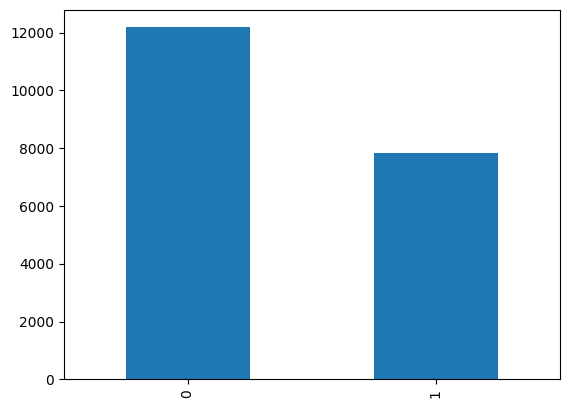

In [ ]:
df['label'].value_counts().plot.bar()

### Train Test Split

Dividing the data into two parts, train data(for training the model) and test data(for evaluation of the model).

In [ ]:
X = df["content"]
Y = df["label"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

### Using Native Bias Algorithm

In [ ]:
X_train1 = [str(text).lower() for text in X_train]
X_test1 = [str(text).lower() for text in X_test]
Y_train1 = Y_train
Y_test1 = Y_test

In [ ]:
vectorizer = TfidfVectorizer(lowercase=True)
vectorizer.fit(X_train1)

X_train1 = vectorizer.transform(X_train)
X_test1 = vectorizer.transform(X_test)

In [ ]:
classifier1=MultinomialNB()
classifier1.fit(X_train1,Y_train1)

MultinomialNB()

In [ ]:
y_pred1 = classifier1.predict(X_test1)

The prediction of the model by Classification report and Confusion matrix.

In [ ]:
print(classification_report(Y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84      3054
           1       0.84      0.52      0.64      1947

    accuracy                           0.78      5001
   macro avg       0.80      0.73      0.74      5001
weighted avg       0.79      0.78      0.76      5001



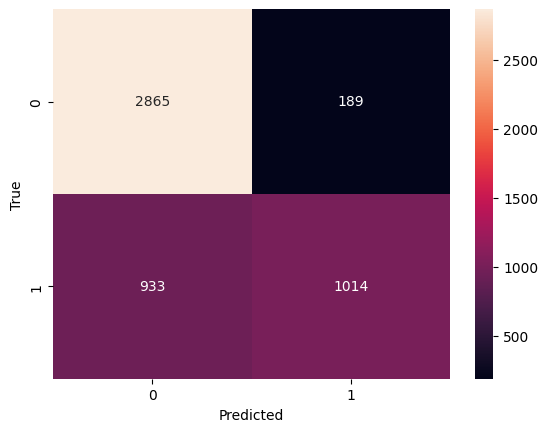

In [ ]:
cm = confusion_matrix(Y_test1, y_pred1)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import pickle
with open('/content/drive/MyDrive/Troll Identification - Nabdeep /Native_Bias_classifier.pkl', 'wb') as f:
    pickle.dump(classifier1, f)

### Using Random Forest Classifier Algorithm

In [ ]:
X_train2 = [str(text).lower() for text in X_train]
X_test2 = [str(text).lower() for text in X_test]
Y_train2 = Y_train
Y_test2 = Y_test

In [ ]:
vectorizer = TfidfVectorizer(lowercase=True)
vectorizer.fit(X_train2)

X_train2 = vectorizer.transform(X_train)
X_test2 = vectorizer.transform(X_test)

In [ ]:
classifier2 = RandomForestClassifier()
classifier2.fit(X_train2, Y_train2)

RandomForestClassifier()

In [ ]:
y_pred2 = classifier2.predict(X_test2)

The prediction of the model by Classification report and Confusion matrix.

In [ ]:
print(classification_report(Y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3054
           1       0.91      0.93      0.92      1947

    accuracy                           0.94      5001
   macro avg       0.93      0.93      0.93      5001
weighted avg       0.94      0.94      0.94      5001



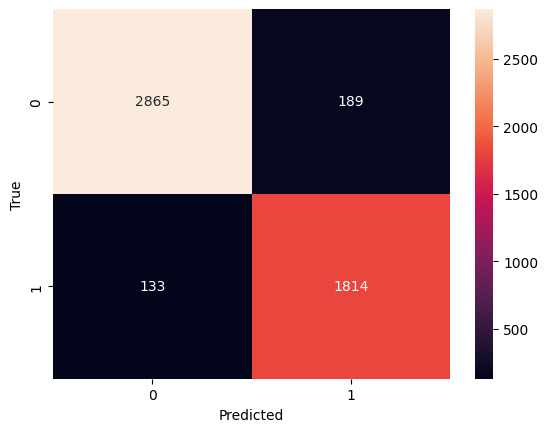

In [ ]:
cm = confusion_matrix(Y_test2, y_pred2)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import pickle
with open('/content/drive/MyDrive/Troll Identification - Nabdeep /Random_Forest_classifier.pkl', 'wb') as f:
    pickle.dump(classifier2, f)

In [ ]:
# prompt: give a get prediction function for the above trained classifier, it must take input from user

def get_prediction():
  text = input("Enter the text: ")

  # Convert the text to lowercase
  text = text.lower()

  # Transform the text using the fitted vectorizer
  text_vectorized = vectorizer.transform([text])

  # Predict the label for the transformed text
  prediction = classifier2.predict(text_vectorized)[0]
  if (prediction == 0):
    a = "This message is perfectly fine"
  else:
    a = "This message is categorised as troll"

  # Return the predicted label
  return a


In [ ]:
get_prediction()

Enter the text: LOL no he said What do you call a jail cell to a gay guy? Paradise! ahaha.


'This message is categorised as troll'

In [ ]:
get_prediction() ## Run it enter the text. It will give prediction